# Minimal example with Tensorflow 2.0

##### Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

###

##### Generating random data

In [18]:
obs = 1000

# From uniform distribution, low -10, high 10, generate 1000,1 matrix
x = np.random.uniform(low=-10, high=10, size=(obs, 1))
z = np.random.uniform(low=-10, high=10, size=(obs, 1))

# 2x 1000,1 matrices into 1000,2 matrix
generated_inputs = np.column_stack((x,z))

In [19]:
generated_inputs.shape

(1000, 2)

In [20]:
# Add in noise, 1000,1 matrix
noise = np.random.uniform(-1,1, (obs,1))
noise[:5]


array([[-0.36471937],
       [ 0.20571295],
       [-0.87580524],
       [ 0.23667766],
       [ 0.93961061]])

In [21]:
# Our target
generated_targets = 2*x - 3*z + 5 + noise

# Tensor-friendly fileformat .npz
# Stores n-dim arrays
np.savez('npz/TF_intro',
         inputs=generated_inputs,
         targets=generated_targets)


## Solving with TF2

In [22]:
training_data = np.load('npz/TF_intro.npz')

In [23]:
# x and z
input_size = 2
# y
output_size = 1

##### Build the model

In [24]:
model = tf.keras.Sequential([
    # Takes the inputs - calculates dot product + bias
    tf.keras.layers.Dense(output_size)
])

In [25]:
# Loss = Mean_squared_error = Objective Function
# Optimizer = Stochastic Gradient Descent = Optimization Algorithm
model.compile(optimizer='SGD', loss='mean_squared_error')

In [26]:
# Fitting the model
model.fit(training_data['inputs'],
          training_data['targets'],
          epochs=30,
          verbose=1)

Epoch 1/30


32/32 [==============================] - 0s 639us/step - loss: 40.8081
Epoch 2/30
32/32 [==============================] - 0s 635us/step - loss: 4.2809
Epoch 3/30
32/32 [==============================] - 0s 618us/step - loss: 1.4785
Epoch 4/30
32/32 [==============================] - 0s 584us/step - loss: 0.6485
Epoch 5/30
32/32 [==============================] - 0s 577us/step - loss: 0.4359
Epoch 6/30
32/32 [==============================] - 0s 603us/step - loss: 0.3742
Epoch 7/30
32/32 [==============================] - 0s 607us/step - loss: 0.3605
Epoch 8/30
32/32 [==============================] - 0s 566us/step - loss: 0.3468
Epoch 9/30
32/32 [==============================] - 0s 681us/step - loss: 0.3437
Epoch 10/30
32/32 [==============================] - 0s 559us/step - loss: 0.3431
Epoch 11/30
32/32 [==============================] - 0s 572us/step - loss: 0.3459
Epoch 12/30
32/32 [==============================] - 0s 649us/step - loss: 0.3448
Epoch 13/30
32/32 [================

## Extracting the weights and biases

* We are looking for 2, -3 for weights and 5 for bias

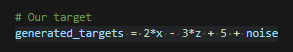

In [27]:
# Weights for the Dense layer in our model
model.layers[0].get_weights()

[array([[ 1.9981382],
        [-3.047539 ]], dtype=float32),
 array([4.946428], dtype=float32)]

* Weights: 1.998, -3.048
* Bias: 4.946

Close enough!

## Predictions

* We can just compare our first 10 inputs to our first 10 targets

In [28]:
model.predict_on_batch(training_data['inputs']).round(1)[:10]

array([[ 17.3],
       [  7.7],
       [-14.3],
       [ 21.9],
       [ 33.2],
       [ -3.1],
       [ 12.6],
       [  1.4],
       [ 11.7],
       [-18.3]], dtype=float32)

In [29]:
training_data['targets'].round(1)[:10]

array([[ 16.7],
       [  8. ],
       [-14.7],
       [ 22.1],
       [ 33.9],
       [ -3.7],
       [ 11.8],
       [  2.4],
       [ 11.5],
       [-17.5]])

## Plotting output vs target

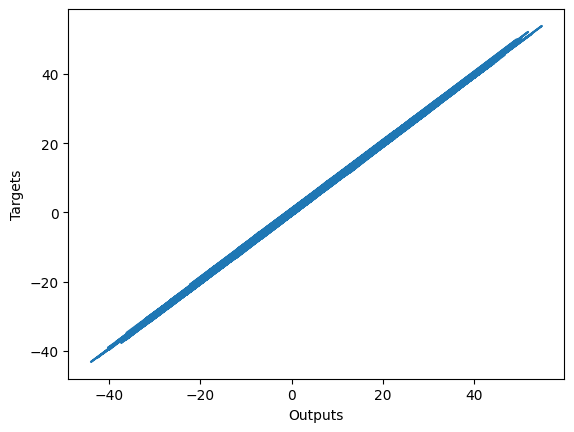

In [31]:
# Use np.squeeze to get rid of 2D
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()

## Looks good to me!